In [ ]:
# Assignment on Regression technique.
# Download temperature data from below link.
# https://www.kaggle.com/venky73/temperaturesof-india?select=temperatures.csv
# This data consists of temperatures of INDIA averaging the temperatures of all places month
# wise. Temperatures values are recorded in CELSIUS
# a) Apply Linear Regression using suitable library function and predict the Month-wise
# temperature.
# b) Assess the performance of regression models using MSE, MAE and R-Square metrics
# c) Visualize simple regression model.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/temperatures.csv')

In [ ]:
data.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   YEAR     117 non-null    int64  
 1   JAN      117 non-null    float64
 2   FEB      117 non-null    float64
 3   MAR      117 non-null    float64
 4   APR      117 non-null    float64
 5   MAY      117 non-null    float64
 6   JUN      117 non-null    float64
 7   JUL      117 non-null    float64
 8   AUG      117 non-null    float64
 9   SEP      117 non-null    float64
 10  OCT      117 non-null    float64
 11  NOV      117 non-null    float64
 12  DEC      117 non-null    float64
 13  ANNUAL   117 non-null    float64
 14  JAN-FEB  117 non-null    float64
 15  MAR-MAY  117 non-null    float64
 16  JUN-SEP  117 non-null    float64
 17  OCT-DEC  117 non-null    float64
dtypes: float64(17), int64(1)
memory usage: 16.6 KB


In [ ]:
data.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,1959.000000,23.687436,25.597863,29.085983,31.975812,33.565299,32.774274,31.035897,30.507692,30.486752,29.766581,27.285470,24.608291,29.181368,24.629573,31.517607,31.198205,27.208120
std,33.919021,0.834588,1.150757,1.068451,0.889478,0.724905,0.633132,0.468818,0.476312,0.544295,0.705492,0.714518,0.782644,0.555555,0.911239,0.740585,0.420508,0.672003
min,1901.000000,22.000000,22.830000,26.680000,30.010000,31.930000,31.100000,29.760000,29.310000,29.070000,27.900000,25.700000,23.020000,28.110000,22.250000,29.920000,30.240000,25.740000
25%,1930.000000,23.100000,24.780000,28.370000,31.460000,33.110000,32.340000,30.740000,30.180000,30.120000,29.380000,26.790000,24.040000,28.760000,24.110000,31.040000,30.920000,26.700000
50%,1959.000000,23.680000,25.480000,29.040000,31.950000,33.510000,32.730000,31.000000,30.540000,30.520000,29.780000,27.300000,24.660000,29.090000,24.530000,31.470000,31.190000,27.210000
75%,1988.000000,24.180000,26.310000,29.610000,32.420000,34.030000,33.180000,31.330000,30.760000,30.810000,30.170000,27.720000,25.110000,29.470000,25.150000,31.890000,31.400000,27.610000
max,2017.000000,26.940000,29.720000,32.620000,35.380000,35.840000,34.480000,32.760000,31.840000,32.220000,32.290000,30.110000,28.010000,31.630000,28.330000,34.570000,32.410000,30.030000


In [ ]:
data.isnull().sum()

YEAR       0
JAN        0
FEB        0
MAR        0
APR        0
MAY        0
JUN        0
JUL        0
AUG        0
SEP        0
OCT        0
NOV        0
DEC        0
ANNUAL     0
JAN-FEB    0
MAR-MAY    0
JUN-SEP    0
OCT-DEC    0
dtype: int64

In [ ]:
years = data["YEAR"]
annual = data["ANNUAL"]

Text(0, 0.5, 'Annual')

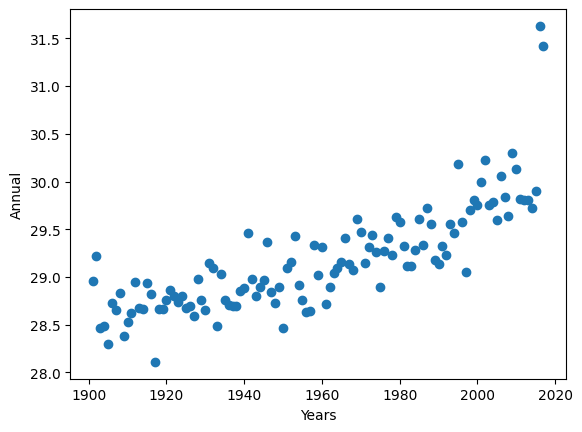

In [ ]:
plt.plot(years,annual,'o')
plt.xlabel("Years")
plt.ylabel("Annual")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [ ]:
x = data.iloc[:,0].values
y = data.iloc[:,13].values


In [ ]:
x

array([1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911,
       1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922,
       1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933,
       1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944,
       1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955,
       1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966,
       1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017])

In [ ]:
y

array([28.96, 29.22, 28.47, 28.49, 28.3 , 28.73, 28.65, 28.83, 28.38,
       28.53, 28.62, 28.95, 28.67, 28.66, 28.94, 28.82, 28.11, 28.66,
       28.66, 28.76, 28.86, 28.8 , 28.74, 28.8 , 28.67, 28.7 , 28.59,
       28.98, 28.76, 28.65, 29.15, 29.09, 28.49, 29.03, 28.76, 28.71,
       28.7 , 28.7 , 28.85, 28.88, 29.46, 28.98, 28.8 , 28.89, 28.97,
       29.37, 28.84, 28.73, 28.89, 28.47, 29.09, 29.16, 29.43, 28.92,
       28.76, 28.63, 28.64, 29.34, 29.02, 29.31, 28.72, 28.89, 29.04,
       29.09, 29.16, 29.41, 29.14, 29.07, 29.61, 29.47, 29.15, 29.31,
       29.44, 29.26, 28.89, 29.27, 29.41, 29.23, 29.63, 29.58, 29.32,
       29.12, 29.11, 29.28, 29.61, 29.33, 29.72, 29.55, 29.18, 29.14,
       29.32, 29.23, 29.55, 29.46, 30.18, 29.58, 29.05, 29.7 , 29.81,
       29.75, 29.99, 30.23, 29.75, 29.79, 29.6 , 30.06, 29.84, 29.64,
       30.3 , 30.13, 29.82, 29.81, 29.81, 29.72, 29.9 , 31.63, 31.42])

In [ ]:
type(x)

numpy.ndarray

In [ ]:
x = x.reshape(117,1)

In [ ]:
x

array([[1901],
       [1902],
       [1903],
       [1904],
       [1905],
       [1906],
       [1907],
       [1908],
       [1909],
       [1910],
       [1911],
       [1912],
       [1913],
       [1914],
       [1915],
       [1916],
       [1917],
       [1918],
       [1919],
       [1920],
       [1921],
       [1922],
       [1923],
       [1924],
       [1925],
       [1926],
       [1927],
       [1928],
       [1929],
       [1930],
       [1931],
       [1932],
       [1933],
       [1934],
       [1935],
       [1936],
       [1937],
       [1938],
       [1939],
       [1940],
       [1941],
       [1942],
       [1943],
       [1944],
       [1945],
       [1946],
       [1947],
       [1948],
       [1949],
       [1950],
       [1951],
       [1952],
       [1953],
       [1954],
       [1955],
       [1956],
       [1957],
       [1958],
       [1959],
       [1960],
       [1961],
       [1962],
       [1963],
       [1964],
       [1965],
       [1966],
       [19

In [ ]:
x.ndim

2

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.25)

print(f"x Training dataset: {x_train.shape}")
print(f"y Training dataset: {y_train.shape}")
print(f"x test dataset: {x_test.shape}")
print(f"y test dataset: {y_test.shape}")

x Training dataset: (87, 1)
y Training dataset: (87,)
x test dataset: (30, 1)
y test dataset: (30,)


In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
model.coef_

array([0.01357327])

In [ ]:
model.intercept_

2.5973840130400667

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred.shape

(30,)

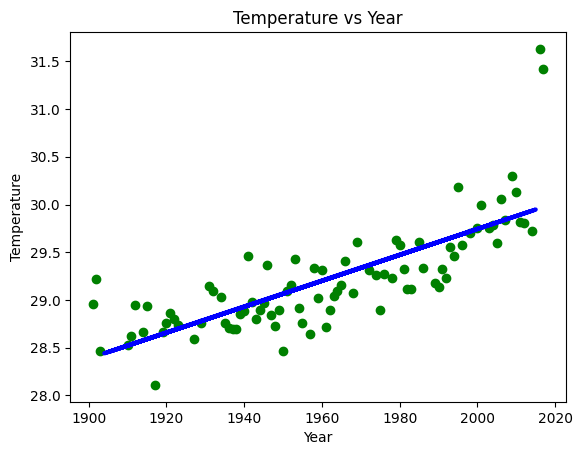

In [ ]:
plt.scatter(x_train, y_train, color='green')
plt.plot(x_test, y_pred, color='blue', linewidth=3)
plt.title("Temperature vs Year")
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.show()

<Axes: >

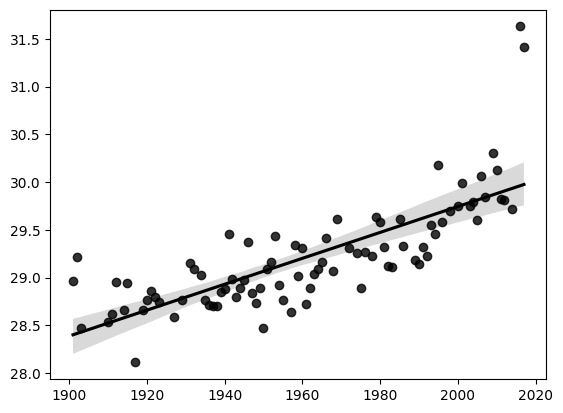

In [ ]:
sns.regplot(data,x=x_train,y=y_train,color="black",label="Temperature vs Year")

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print(f"MSE:  {mean_squared_error(y_test,y_pred)}")
print(f"MAE:  {mean_absolute_error(y_test,y_pred)}")
print(f"R-Sqaure :  {r2_score(y_test,y_pred)}")

MSE:  0.05500578689266352
MAE:  0.18058682767046969
R-Sqaure :  0.7885915133615444
